# Defs

## Import

In [56]:
import csv
from nltk.corpus import stopwords
from statistics import mean
import matplotlib.pyplot as plt
from gensim.test.utils import simple_preprocess

## Preprocessing

In [57]:
def preprocess_string(sentence): 
    res = []
    sentence = simple_preprocess(sentence)
    for word in sentence:
        if word not in stopwords.words("english"):
            res.append(word)
    return res

## Estrazione dati dal file

Per estrarre i dati dal file preprocessiamo le varie definizioni e le salviamo in un dizionario che ha per chiavi i quattro concetti.

In [58]:
def get_definitions(path):
    with open(path, 'r') as file:
        definitions = dict()
        for row in csv.reader(file):
            concept = row[0].lower()
            definitions[concept] = []
            for definition in row[1:]:
                definition = preprocess_string(definition)
                if len(definition) != 0:
                    definitions[concept].append(definition)
    return definitions

## Calcolo similarità

Per calcolare la similarità di due definizioni scegliamo un approccio molto semplice: prendiamo la cardinalità dell'intersezione degli insiemi dei termini utilizzati.
Inoltre prima di restituire la media la dividiamo per il valore massimo in modo da portarla tra 0 e 1, così da poterla confrontare con le medie degli altri concetti.

In [59]:
def compute_similarity(def1, def2):
    return len(set(def1) & set(def2))

def avg_sim_of_concept(definitions):
    sim = []
    for i in range(0, len(definitions)):
        for j in range(i, len(definitions)):
            sim.append(compute_similarity(definitions[i], definitions[j]))
    return mean(sim) / max(sim)

A questo punto calcoliamo i valori di similarità per ciascun concetto.

In [60]:
def compute_similarities_of_concepts(concepts, definitions):
    similarities = dict((concept,0) for concept in concepts)
    for concept in concepts:
        sim = round(avg_sim_of_concept(definitions[concept]), 4)
        similarities[concept] = sim
    return similarities

## Plot dei risultati

In ultimo plottiamo i risultati ottenuti in una tabella, aggregando rispetto alle dimensioni Concreto/Astratto e Generico/Specifico

In [61]:
def print_table(similarities):
    fig, ax = plt.subplots()

    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    c = ['Concreto', 'Astratto']
    r = ['Generico', 'Specifico']
    
    similarities = [
        [similarities['emotion'], similarities['person']],
        [similarities['brick'], similarities['revenge']]
    ]

    ax.table(cellText=similarities, 
            colLabels=c, 
            rowLabels=r, 
            loc='center',
            cellLoc='center')

    fig.tight_layout()
    plt.show()

## Esecuzione

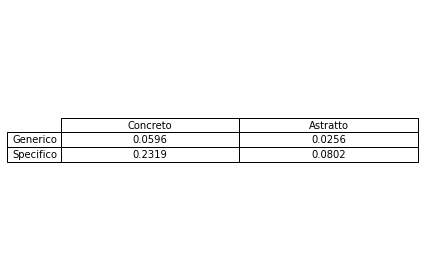

In [62]:
PATH = 'resources/definizioni.csv'
concepts = ['emotion', 'person', 'brick', 'revenge']

definitions = get_definitions(PATH)
similarities = compute_similarities_of_concepts(concepts, definitions)
print_table(similarities)